In [1]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00):
    from matplotlib import pyplot as plt 
    import matplotlib.gridspec as gridspec
    
    gs = gridspec.GridSpec(nRows, nCols)     
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')

        plt.subplot(nRows, nCols,i+1)

        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        plt.title("Image " + str(i))
        plt.axis('off')

    plt.show()

In [3]:
def InfoImage(IM):
    Image = IM
    Width = Image.shape[1]
    Height = Image.shape[0]
    Channel = len(Image.shape)
    print("Width : ", Width, " Height : ", Height, " Channel : ", Channel)
    
    if(Channel == 2):
        print("Min Intensity: ", IM.min(), " Max Intensity: ", IM.max())
    else:
        print("Red - Min Intensity: ", IM[:,:,0].min(), " Max Intensity: ", IM[:,:,0].max())
        print("Green - Min Intensity: ", IM[:,:,1].min(), " Max Intensity: ", IM[:,:,1].max())
        print("Blue - Min Intensity: ", IM[:,:,2].min(), " Max Intensity: ", IM[:,:,2].max())  

In [4]:
def ResizeImage(IM, DesiredWidth, DesiredHeight):
    from skimage.transform import rescale, resize
    
    OrigWidth = float(IM.shape[1])
    OrigHeight = float(IM.shape[0])
    Width = DesiredWidth 
    Height = DesiredHeight

    if((Width == 0) & (Height == 0)):
        return IM
    
    if(Width == 0):
        Width = int((OrigWidth * Height)/OrigHeight)

    if(Height == 0):
        Height = int((OrigHeight * Width)/OrigWidth)

    dim = (Width, Height)
    resizedIM = cv2.resize(IM, dim, interpolation = cv2.INTER_NEAREST) 
    return resizedIM

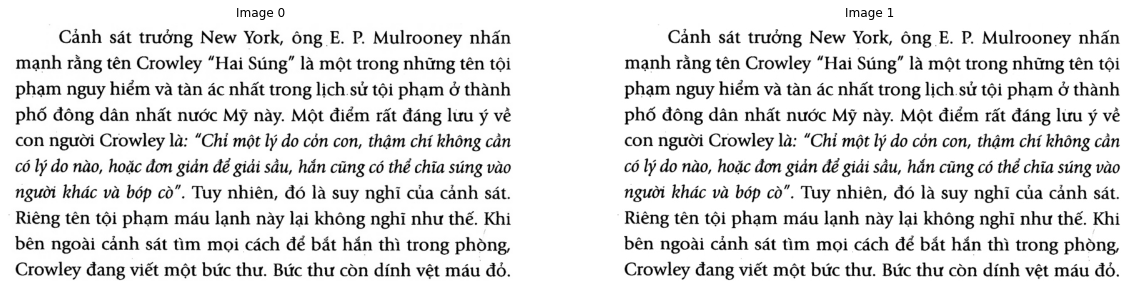

In [5]:
# Read Image 
# path = r"D:\\MSI DATA (Previous Computer)\\Teaching And Training\\Phan Tich Xu Ly Anh\\Sample08\\"
image_color = imread("Sample07/Newspaper.jpg")
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
# Display Image
ShowImage([image_color, image_gray], 1, 2)

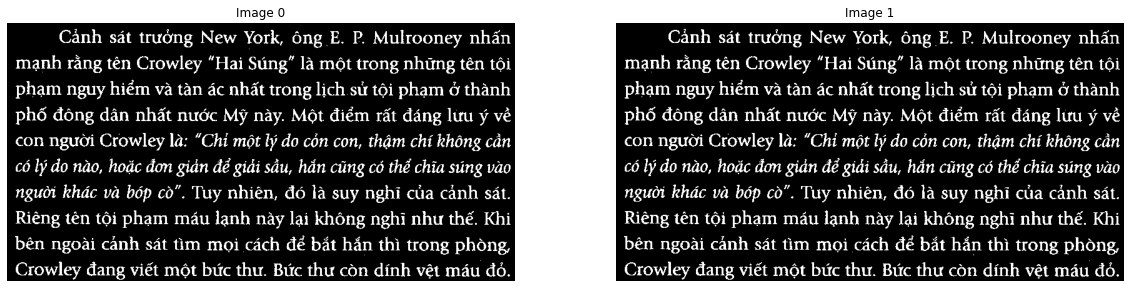

150.0


In [6]:
image_mask01 = (image_gray < 150).astype(np.uint8) * 255  # Change 0-1 to range 0-255
thresh, image_mask02 = cv2.threshold(image_gray,150,255,cv2.THRESH_BINARY_INV)
ShowImage([image_mask01, image_mask02], 1, 2)
print(thresh)

Giá trị của pixel đầu ra là giá trị lớn nhất của tất cả các pixel trong vùng lân cận.  Trong hình ảnh nhị phân, một pixel được đặt thành 1 nếu bất kỳ pixel nào lân cận có giá trị 1. Sự giãn nở hình thái làm cho các đối tượng dễ nhìn thấy hơn và lấp đầy các lỗ nhỏ trên các đối tượng

[[1 1 1]
 [1 1 1]
 [1 1 1]]


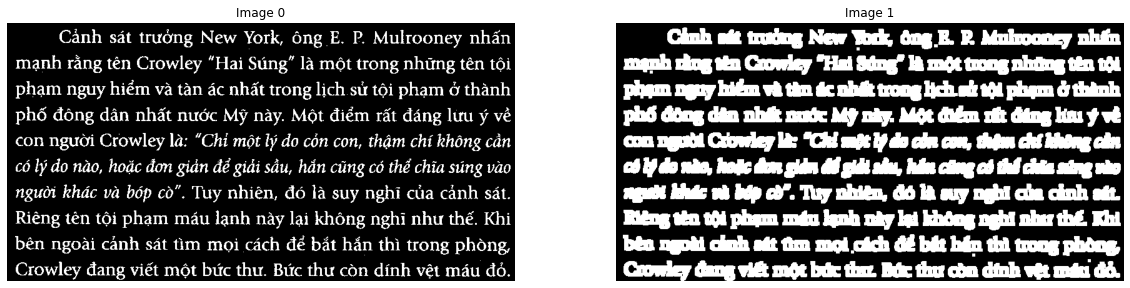

In [7]:
kernel = np.ones((3,3),np.uint8)
print(kernel)
image_dilated = cv2.dilate(image_mask01, kernel, iterations = 2)
ShowImage([image_mask01, image_dilated], 1, 2)

In [8]:
result = image_color.copy()

contours, hierarchy = cv2.findContours(image_dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

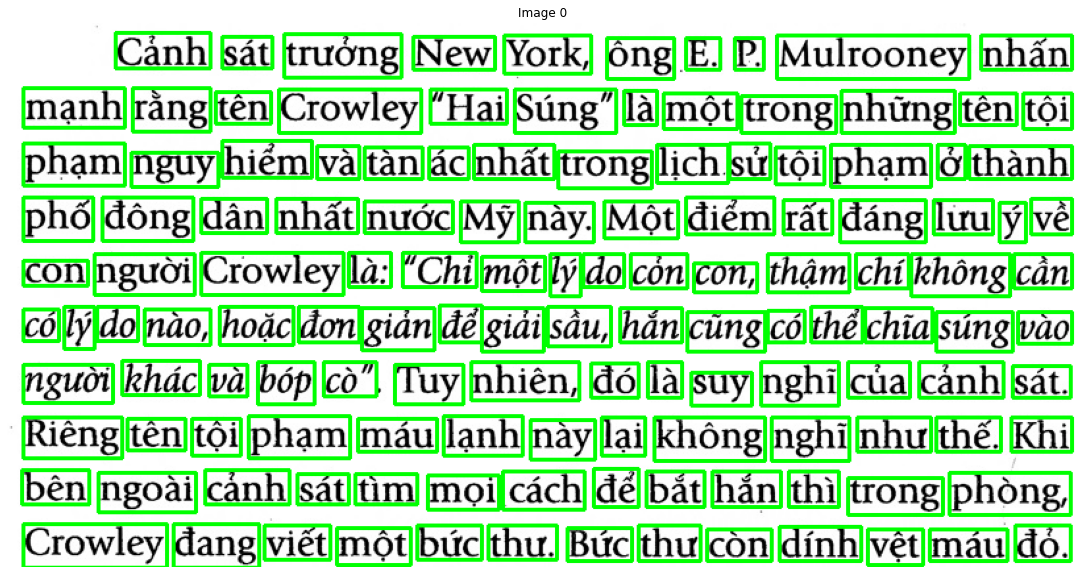

,x,y,w,h
0,700,384,59,24
1,653,384,42,27
2,531,384,49,24
3,425,383,49,25
4,250,383,56,28


In [9]:
ShowImage([result], 1, 1)
display(DataDF.head())